<a href="https://colab.research.google.com/github/edvaldolaraujo/datascience_testeshipoteses/blob/main/ANOVA_de_um_fator_(One_Way_ANOVA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA de um fator (One-Way ANOVA)

## Introdução
A Análise de Variância (ANOVA) é um teste utilizado para comparar médias de três ou mais populações, por meio da análise de variâncias amostrais. O teste se baseia em uma amostra extraída de cada população, com o intuito de determinar se as diferenças entre as médias amostrais sugerem diferenças significativas entre as médias populacionais, ou se tais diferenças são decorrentes apenas da variabilidade implícita da amostra.

As suposições da ANOVA são:

* as amostras devem ser independentes entre si;
* os dados nas populações devem apresentar distribuição normal;
* as variâncias populacionais devem ser homogêneas.

A ANOVA de um fator, conhecida em inglês como **One-Way ANOVA**, é a extensão do teste t de Student para duas médias populacionais, o que permite ao pesquisador a comparação de três ou mais médias populacionais.

A **hipótese nula (H0)** do teste afirma que as médias populacionais são iguais; se existir pelo menos um grupo com média diferente dos demais, a hipótese nula é rejeitada.

## Carregando Pacotes

In [ ]:
%pip install pyreadstat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.api as sms
import numpy as np
import math

pd.options.display.float_format = "{:,.2f}".format

CAMINHO = 'drive/MyDrive/Colab Notebooks/datasets/'


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregando dados

In [ ]:
base = pd.read_spss(CAMINHO+'ANOVA_Um_Fator.sav')
base

,Fornecedor,Sacarose
0,1.00,0.33
1,1.00,0.79
2,1.00,1.24
3,1.00,1.75
4,1.00,0.94
5,1.00,2.42
6,1.00,1.97
7,1.00,0.87
8,1.00,0.33
9,1.00,0.79


## Análise Exploratória

In [ ]:
Fornec_1 = base.loc[base['Fornecedor'] == 1].drop('Fornecedor', axis=1)
Fornec_2 = base.loc[base['Fornecedor'] == 2].drop('Fornecedor', axis=1)
Fornec_3 = base.loc[base['Fornecedor'] == 3].drop('Fornecedor', axis=1)

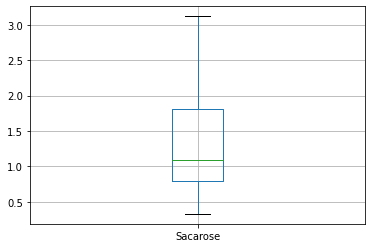

In [ ]:
Fornec_1.boxplot('Sacarose')

(array([0.74671446, 0.44802867, 0.29868578, 0.14934289, 0.14934289]),
 array([0.33 , 0.888, 1.446, 2.004, 2.562, 3.12 ]),
 <a list of 5 Patch objects>)

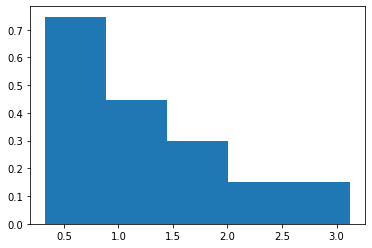

In [ ]:
plt.hist(Fornec_1['Sacarose'], density=True, bins=5)

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([0.33, 0.33, 0.79, 0.79, 0.87, 0.94, 1.24, 1.24, 1.75, 1.97, 2.42,
         3.12])),
 (0.8781545913805932, 1.3158333333333336, 0.9583897360358526))

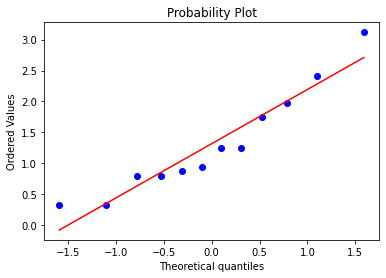

In [ ]:
stats.probplot(Fornec_1['Sacarose'], plot=plt)

## Teste Shapiro-Wilk

In [ ]:
sw_test, p = stats.shapiro(Fornec_1['Sacarose'])
if (p>0.05):
    print(sw_test,p, 'Não rejeitar H0')
else:
    print(sw_test,p, 'Rejeitar H0')

0.9148621559143066 0.24615293741226196 Não rejeitar H0


como pvalue (ou P-Valor) é maior que 0.05 então a hipótese nula (H0) não é rejeitada. O que permite concluir, ao nível de confiança de 95%, que a amostra é obtida de uma população com distribuição normal. 

In [ ]:
sw_test, p = stats.shapiro(Fornec_2['Sacarose'])
if (p>0.05):
    print(sw_test,p, 'Não rejeitar H0')
else:
    print(sw_test,p, 'Rejeitar H0')

0.9290102124214172 0.4382273554801941 Não rejeitar H0


como pvalue (ou P-Valor) é maior que 0.05 então a hipótese nula (H0) não é rejeitada. O que permite concluir, ao nível de confiança de 95%, que a amostra é obtida de uma população com distribuição normal. 

In [ ]:
sw_test, p = stats.shapiro(Fornec_3['Sacarose'])
if (p>0.05):
    print(sw_test,p, 'Não rejeitar H0')
else:
    print(sw_test,p, 'Rejeitar H0')

0.8831188678741455 0.14167983829975128 Não rejeitar H0


## Teste F de Levene

In [ ]:
teste, p = stats.levene(Fornec_1['Sacarose'], Fornec_2['Sacarose'], Fornec_3['Sacarose'] )
if p>0.05:
    print(teste, p, 'Não Rejeitar H0!!!')
else:
    print(teste, p, 'Rejeitar H0!!!')
print()

0.3181979846892983 0.7299663375834846 Não Rejeitar H0!!!



como pvalue (ou P-Valor) é maior que 0.05 então a hipótese nula (H0) não é rejeitada. O que permite concluir, ao nível de confiança de 95%, que as amostras são homogêneas. 

## Teste Anova Two-Way

In [ ]:
teste, p = stats.f_oneway(Fornec_1['Sacarose'], Fornec_2['Sacarose'], Fornec_3['Sacarose'] )

if p>0.05:
    print(teste, p, 'Não Rejeitar H0')
else:
    print(teste, p,'Rejeitar H0')

4.675996744085605 0.017371839041354833 Rejeitar H0


## Conclusão
como pvalue (ou P-Valor) é menor ou igual  a 0.05 então a hipótese nula (H0)  é rejeitada.

o que nos permite concluir, ao nível de confiança de 95%, que existe pelo menos um fornecedor com média populacional diferente dos demais  